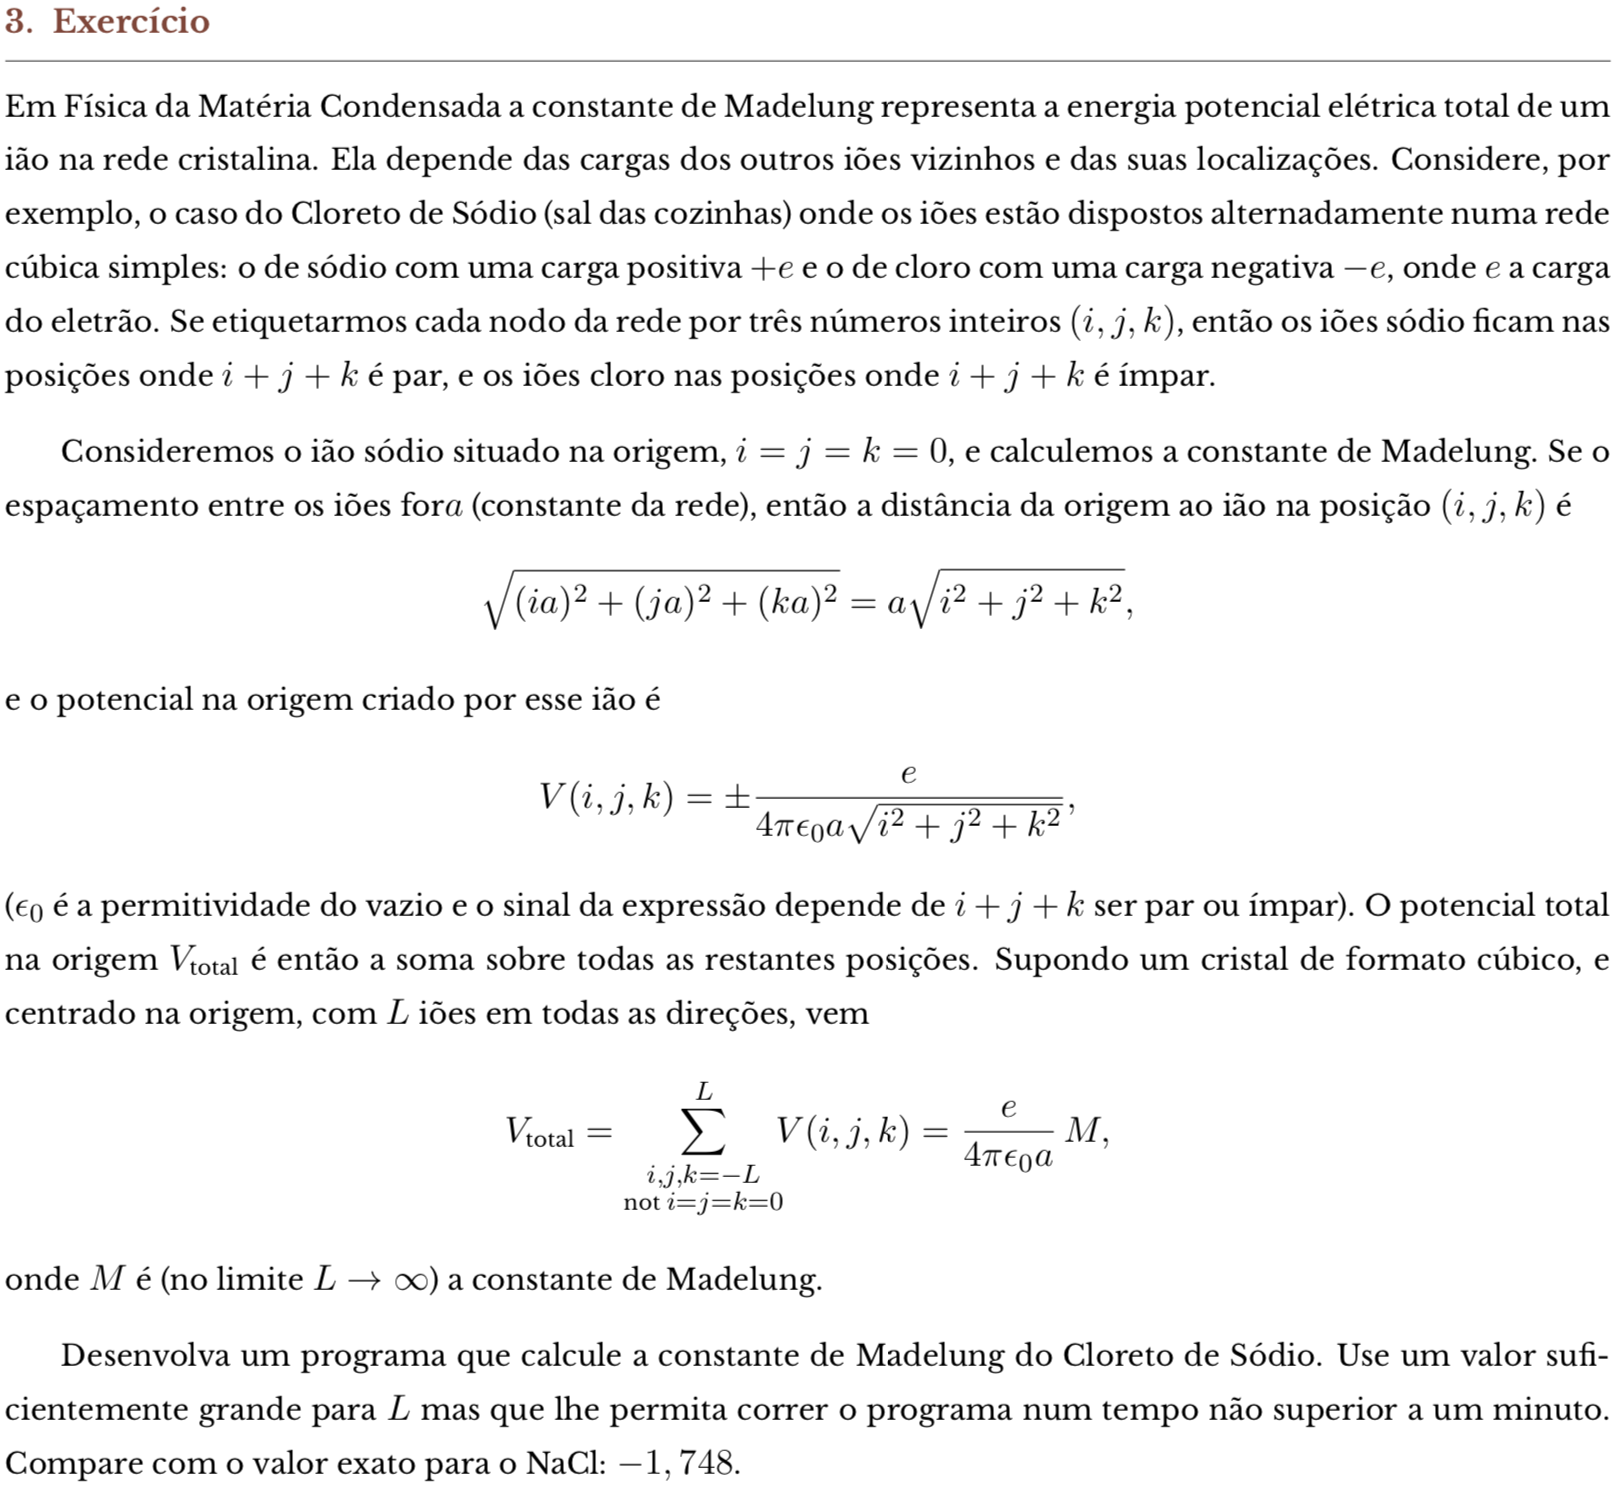

In [3]:
import numpy as np
from math import sqrt

In [161]:
def Madelung1(L):
    A = 0
    B = 0
    C = 0
    for i in range(1, L):
        for j in range(1, L):
            for k in range(1, L):
                if (i + j + k) % 2 == 0:
                    A += 1 / sqrt(i*i + j*j + k*k)
                else:
                    A -= 1 / sqrt(i*i + j*j + k*k)
    for i in range(1, L):
        for j in range(1, L):
            if (i + j) % 2 == 0:
                B += 1 / sqrt(i*i + j*j)
            else:
                B -= 1 / sqrt(i*i + j*j)
    for i in range(1, L, 2):
        C -= 1 / i
    for i in range(2, L, 2):
        C += 1 / i     
    return 8 * A + 12 * B + 6 * C 

# Quero mais e mais simetria

In [74]:
L = 600

In [34]:
def Madelung(L):
    
    i, j, k = np.ogrid[1:L, 1:L, 1:L]
    
    volume = ((((-1)**(i + j + k))/np.sqrt(i**2 + j**2 + k**2))).sum()
    plane = (((-1)**(i + j))/np.sqrt(i**2 + j**2)).sum()
    line = ((-1)**i/i).sum()

    return 8 * volume + 12 * plane + 6 * line

In [35]:
%timeit -n 1 -r 1 print(Madelung(L))

-1.7487204510288432
8.37 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [77]:
def Madelung32(L):
    
    def V3(x, y, z):
            return (-1)**(x + y + z)/np.sqrt(x**2 + y**2 + z**2)
    
    def V2(x, y):
            return (-1)**(x + y)/np.sqrt(x**2 + y**2)
        
    def V1(x):
            return (-1)**x/x
    
             
    i = np.arange(1, L, dtype='float32')
    j = np.arange(1, L, dtype='float32')
    k = np.arange(1, L, dtype='float32')
    
    volume = V3(i[:,None,None], j[None,:,None],k[None,None,:])
    
    plane = V2(i[:,None], j[None,:])
    
    line = V1(i)
    
    
    #volume = ((((-1)**(i + j + k))/np.sqrt(i**2 + j**2 + k**2))).sum()
    #plane = (((-1)**(i + j))/np.sqrt(i**2 + j**2)).sum()
    #line = ((-1)**i/i).sum()

    return 8 * volume.sum() + 12 * plane.sum() + 6 * line.sum()

In [78]:
%timeit -n 1 -r 1 print(Madelung2(L))

-1.7488455772399902
3.68 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
